In [1]:
#This is concise version that includes "Buy_Confidence"

# Import dependencies
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
import warnings
%matplotlib inline

In [2]:
# Read-in data as Excel file
vix_data_file = "C:/Users/blake/Desktop/clean_stock_data.xlsx"

In [3]:
# vix_volume_file = "C:/Users/blake/Desktop/volume_data.xlsx"

In [4]:
#Convert Excel file to Dataframe
stock_data_df = pd.read_excel(vix_data_file,
sheet_name=0,
header=1,
index_col=False,
keep_default_na=False
)

In [5]:
# #Convert Excel file to Dataframe
# volume_data_df = pd.read_excel(vix_volume_file,
# sheet_name=0,
# header=1,
# index_col=False,
# keep_default_na=False
# )

In [6]:

# #Create new Dataframe, set 'Date' as index, drop column named 'Date' 
# time_indexed_volume_df = volume_data_df.set_index(volume_data_df['Date'])
# time_indexed_volume_df = time_indexed_volume_df.drop(['Date'], axis=1)
# time_indexed_volume_df.head(10)

In [7]:
#Create new Dataframe, set 'Date' as index, drop column named 'Date' 
time_indexed_stock_df = stock_data_df.set_index(stock_data_df['Date'])
time_indexed_stock_df = time_indexed_stock_df.drop(['Date'], axis=1)
time_indexed_stock_df.head(10)

,PX_LAST_ESA,PX_LAST_1,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8
Date,,,,,,,,,
2009-12-31,1115.10,22.95,25.80,26.00,26.30,26.35,26.30,26.40,26.35
2010-01-01,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-04,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-05,1136.52,21.55,24.45,24.85,25.45,25.50,25.50,25.55,25.70
2010-01-06,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30
2010-01-07,1141.69,20.45,23.15,23.85,24.75,24.85,24.85,24.90,25.10
2010-01-08,1144.98,19.90,22.55,23.40,24.40,24.65,24.60,24.75,24.90
2010-01-11,1146.98,19.50,22.25,23.25,24.15,24.30,24.40,24.50,24.65
2010-01-12,1136.22,20.25,22.80,23.65,24.25,24.45,24.45,24.60,24.75


In [8]:
time_indexed_stock_df.count()
# # (If necessary) Convert Dataframe to CSV and put in same directory
# time_indexed_volume_df.to_csv('vix_volume.csv')

PX_LAST_ESA    2528
PX_LAST_1      2528
PX_LAST_2      2528
PX_LAST_3      2528
PX_LAST_4      2528
PX_LAST_5      2528
PX_LAST_6      2528
PX_LAST_7      2528
PX_LAST_8      2528
dtype: int64

In [9]:
buy_conf_dict = {
    'Date':['2010-01-22', '2010-02-08', '2010-05-07', '2010-05-20', '2010-06-07',
            '2010-06-29', '2011-04-15', '2011-08-15', '2011-08-23', '2011-09-06',
            '2011-09-26', '2011-10-03', '2011-11-02', '2011-11-09', '2011-11-28',
            '2012-05-18', '2012-06-01', '2012-12-31', '2013-06-24', '2013-10-09',
            '2013-10-16', '2014-02-04', '2014-02-06', '2014-03-03', '2014-03-14',
            '2014-04-14', '2014-08-07', '2014-10-14', '2014-10-16', '2014-10-23',
            '2014-12-17', '2015-01-07', '2015-01-15', '2015-01-29', '2015-02-02',
            '2015-06-30', '2015-07-06', '2015-07-10', '2015-08-26', '2015-09-02',
            '2015-09-04', '2015-09-10', '2015-09-29', '2015-11-13', '2015-12-14',
            '2015-12-18', '2016-01-04', '2016-01-11', '2016-01-18', '2016-01-21',
            '2016-02-12', '2016-06-14', '2016-06-28', '2016-11-04', '2017-08-11',
            '2017-08-18', '2018-02-06', '2018-02-09', '2018-03-02', '2018-03-26',
            '2018-03-29', '2018-04-02', '2018-04-10', '2018-04-26', '2018-06-28',
            '2018-10-12', '2018-10-30', '2018-11-15', '2018-11-21', '2018-12-05',
            '2018-12-10', '2018-12-19', '2018-12-25', '2018-12-31', '2019-01-04',
            '2019-01-22', '2019-01-29', '2019-03-08', '2019-03-25', '2019-05-09',
            '2019-05-14', '2019-05-24', '2019-06-04', '2019-08-06', '2019-08-13',
            '2019-08-16', '2019-08-26', '2019-08-28', '2019-09-04'],
    'Buy_Conf':[8, 10, 7, 8, 7,
                9, 9, 2, 3, 3,
                2, 6, 2, 3, 4,
                5, 5, 7, 7, 8,
                5, 9, 9, 5, 7,
                5, 5, 8, 9, 2,
                8, 7, 7, 7, 7,
                5, 5, 7, 7, 8,
                7, 7, 7, 8, 7,
                7, 8, 7, 7, 7,
                7, 7, 10, 9, 7,
                7, 8, 3, 4, 2,
                5, 5, 5, 5, 5,
                3, 4, 3, 4, 2,
                2, 5, 5, 4, 4,
                5, 6, 4, 3, 7,
                7, 3, 2, 8, 7,
                7, 7, 8, 7
               ]
    }


In [10]:
buy_conf_df = pd.DataFrame(buy_conf_dict)
buy_conf_df.count()

Date        89
Buy_Conf    89
dtype: int64

In [11]:
#Create new Dataframe, set 'Date' as index, drop column named 'Date' 
conf_time_indexed_df = buy_conf_df.set_index(buy_conf_df['Date'])
conf_time_indexed_df = conf_time_indexed_df.drop(['Date'], axis=1)
conf_time_indexed_df.count()

Buy_Conf    89
dtype: int64

In [12]:
#Joined Dataframes where index ('Date') matches

vix_joined_buy_conf_df = conf_time_indexed_df.join(time_indexed_stock_df)
vix_joined_buy_conf_df.head(10)
# print(vix_joined_buy_conf_df['PX_LAST_1'][0:29])
# print(vix_joined_buy_conf_df['PX_LAST_1'][30:59])
# print(vix_joined_buy_conf_df['PX_LAST_1'][60:88])
#Some of these original "Erkan Dates" are Nan
#2011-04-16, 2011-09-25, 2012-05-19, 2015-09-05, 2015-11-14, 2015-12-19, 2017-08-12
#vix_joined_buy_conf_df.isna().sum()

#Blake went back and changed dates to true 'trading day'
#New dates (respectively)
#2011-04-15, 2011-09-26, 2012-05-18, 2015-09-04, 2015-11-13, 2015-12-18, 2017-08-11

#Note: Mostly Saturday's (meaning Friday important?)

,Buy_Conf,PX_LAST_ESA,PX_LAST_1,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8
Date,,,,,,,,,,
2010-01-22,8,1091.76,24.75,25.15,25.35,25.40,25.35,25.50,25.35,25.15
2010-02-08,10,1056.74,26.40,26.20,26.30,26.20,26.30,26.35,26.25,26.35
2010-05-07,7,1110.88,32.95,30.95,30.90,30.75,31.10,31.00,30.85,30.80
2010-05-20,8,1071.59,35.95,35.70,34.00,34.30,33.80,33.30,32.90,33.15
2010-06-07,7,1050.47,35.45,34.10,33.15,33.45,33.05,32.75,31.95,32.40
2010-06-29,9,1041.24,33.50,33.45,34.75,34.75,34.25,33.50,34.20,33.80
2011-04-15,9,1319.68,16.75,19.65,21.15,22.05,22.70,23.50,24.20,24.50
2011-08-15,2,1204.49,32.10,26.70,25.95,25.45,24.50,25.70,25.80,25.95
2011-08-23,3,1162.35,34.30,31.75,30.60,28.90,29.90,29.85,29.80,30.05


In [13]:
#Drop 'Buy_Conf' and 'PX_LAST_ESA ("SPX")' columns
vix_for_conf_dates_df = vix_joined_buy_conf_df.drop(columns=['Buy_Conf', 'PX_LAST_ESA'])

#Calculate Standard Deviation of all (and only) VIX Futures on "Erkan Dates"
std_dev_vix = vix_for_conf_dates_df.std(axis=1)

In [14]:
#Add column of 1/StdDev to joined DataFrame
#Because we want "closer numbers" (lower StdDev) to have "more weight"
vix_joined_buy_conf_df.insert(loc=0, column='1/StdDev', value=1/std_dev_vix)

In [15]:
#Rename columns
vix_joined_buy_conf_df.rename(columns={
    'PX_LAST_ESA': 'SPX',
    'PX_LAST_1': 'VIX_1',
    'PX_LAST_2': 'VIX_2',
    'PX_LAST_3': 'VIX_3',
    'PX_LAST_4': 'VIX_4',
    'PX_LAST_5': 'VIX_5',
    'PX_LAST_6': 'VIX_6',
    'PX_LAST_7': 'VIX_7',
    'PX_LAST_8': 'VIX_8'
})

,1/StdDev,Buy_Conf,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8
Date,,,,,,,,,,,
2010-01-22,4.264014,8,1091.76,24.750,25.150,25.350,25.400,25.350,25.500,25.350,25.150
2010-02-08,13.719887,10,1056.74,26.400,26.200,26.300,26.200,26.300,26.350,26.250,26.350
2010-05-07,1.368314,7,1110.88,32.950,30.950,30.900,30.750,31.100,31.000,30.850,30.800
2010-05-20,0.877359,8,1071.59,35.950,35.700,34.000,34.300,33.800,33.300,32.900,33.150
2010-06-07,0.918146,7,1050.47,35.450,34.100,33.150,33.450,33.050,32.750,31.950,32.400
2010-06-29,1.841149,9,1041.24,33.500,33.450,34.750,34.750,34.250,33.500,34.200,33.800
2011-04-15,0.384458,9,1319.68,16.750,19.650,21.150,22.050,22.700,23.500,24.200,24.500
2011-08-15,0.427878,2,1204.49,32.100,26.700,25.950,25.450,24.500,25.700,25.800,25.950
2011-08-23,0.593358,3,1162.35,34.300,31.750,30.600,28.900,29.900,29.850,29.800,30.050


In [16]:
vix_joined_buy_conf_df.describe()

,1/StdDev,Buy_Conf,PX_LAST_ESA,PX_LAST_1,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2.232762,5.898876,2079.124494,22.424101,21.641292,21.493820,21.469663,21.517697,21.625562,21.731180,21.836798
std,2.203106,2.137569,587.695192,6.144478,5.405638,5.081045,4.953781,4.872683,4.758185,4.688347,4.640124
min,0.280068,2.000000,1041.240000,14.975000,15.125000,15.375000,15.325000,15.725000,16.525000,16.925000,17.250000
25%,1.107698,4.000000,1773.430000,18.125000,18.275000,18.150000,18.300000,18.150000,18.475000,18.675000,18.900000
50%,1.546407,7.000000,2021.250000,20.175000,19.650000,19.600000,19.775000,19.850000,19.875000,19.950000,20.050000
75%,2.791291,7.000000,2649.930000,24.750000,22.675000,22.225000,22.325000,22.675000,22.775000,22.775000,22.825000
max,13.719887,10.000000,2937.780000,45.050000,40.550000,36.700000,37.050000,35.600000,35.150000,35.300000,34.650000


In [17]:
time_indexed_stock_df.head()

,PX_LAST_ESA,PX_LAST_1,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8
Date,,,,,,,,,
2009-12-31,1115.10,22.95,25.80,26.00,26.30,26.35,26.30,26.40,26.35
2010-01-01,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-04,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-05,1136.52,21.55,24.45,24.85,25.45,25.50,25.50,25.55,25.70
2010-01-06,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30


In [18]:
#Rename columns
new_name_df =time_indexed_stock_df.rename(columns={
    'PX_LAST_ESA': 'SPX',
    'PX_LAST_1': 'VIX_1',
    'PX_LAST_2': 'VIX_2',
    'PX_LAST_3': 'VIX_3',
    'PX_LAST_4': 'VIX_4',
    'PX_LAST_5': 'VIX_5',
    'PX_LAST_6': 'VIX_6',
    'PX_LAST_7': 'VIX_7',
    'PX_LAST_8': 'VIX_8'
})

In [19]:
#drop SPX to create Dataframe of only VIX quotes
vix_only_df = new_name_df.drop(['SPX'], axis=1)
vix_only_df.head(5)

,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8
Date,,,,,,,,
2009-12-31,22.95,25.80,26.00,26.30,26.35,26.30,26.40,26.35
2010-01-01,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-04,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95
2010-01-05,21.55,24.45,24.85,25.45,25.50,25.50,25.55,25.70
2010-01-06,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30


In [20]:
# create Dataframe of only SPX
spx_df = new_name_df.filter(['SPX'], axis=1)
spx_df.head(10)


,SPX
Date,
2009-12-31,1115.10
2010-01-01,1132.98
2010-01-04,1132.98
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
2010-01-11,1146.98
2010-01-12,1136.22


In [21]:
#Create 'spx_rolling_df' which is actually an object with window=5
spx_rolling_df = spx_df.rolling(window=5)

#Create Dataframe of 5 day moving avg of SPX
spx_5day_df = spx_rolling_df.mean()
spx_5day_df.head(10)

,SPX
Date,
2009-12-31,NaN
2010-01-01,NaN
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,1130.944
2010-01-07,1136.262
2010-01-08,1138.662
2010-01-11,1141.462
2010-01-12,1141.402


In [22]:
#rename column
spx_5day_df['SPX_tomorrow'] = new_name_df['SPX']


#shift 'tomorrow' up one row
spx_5day_df['SPX_tomorrow'] = spx_5day_df['SPX_tomorrow'].shift(-1)


spx_5day_df.head(10)

#avg of days "t-4 to t"
#jan 6 is avg of 12/31, 1/1, 1/4/, 1/5, 1/6

,SPX,SPX_tomorrow
Date,,
2009-12-31,NaN,1132.98
2010-01-01,NaN,1132.98
2010-01-04,NaN,1136.52
2010-01-05,NaN,1137.14
2010-01-06,1130.944,1141.69
2010-01-07,1136.262,1144.98
2010-01-08,1138.662,1146.98
2010-01-11,1141.462,1136.22
2010-01-12,1141.402,1145.68


In [23]:
spx_5day_df.tail(10)

,SPX,SPX_tomorrow
Date,,
2019-08-27,2888.406,2887.94
2019-08-28,2881.108,2924.58
2019-08-29,2881.434,2926.46
2019-08-30,2897.304,2906.27
2019-09-02,2902.882,2906.27
2019-09-03,2910.304,2937.78
2019-09-04,2920.272,2976.00
2019-09-05,2930.556,2978.71
2019-09-06,2941.006,2971.84


In [24]:
#Dataframe with correct column names and values in correct row

spx_5day_df = spx_5day_df.rename(columns={'SPX':'m5avg'})
spx_5day_df.head(10)

,m5avg,SPX_tomorrow
Date,,
2009-12-31,NaN,1132.98
2010-01-01,NaN,1132.98
2010-01-04,NaN,1136.52
2010-01-05,NaN,1137.14
2010-01-06,1130.944,1141.69
2010-01-07,1136.262,1144.98
2010-01-08,1138.662,1146.98
2010-01-11,1141.462,1136.22
2010-01-12,1141.402,1145.68


In [25]:
#Drop Nan rows

spx_5day_df = spx_5day_df.dropna()
spx_5day_df.head(10)

,m5avg,SPX_tomorrow
Date,,
2010-01-06,1130.944,1141.69
2010-01-07,1136.262,1144.98
2010-01-08,1138.662,1146.98
2010-01-11,1141.462,1136.22
2010-01-12,1141.402,1145.68
2010-01-13,1143.110,1148.46
2010-01-14,1144.464,1136.03
2010-01-15,1142.674,1150.23
2010-01-18,1143.324,1150.23


In [26]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = spx_5day_df["m5avg"].values.reshape(-1, 1)
y = spx_5day_df["SPX_tomorrow"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2523, 1) (2523, 1)


Text(0, 0.5, 'SPX (tomorrow)')

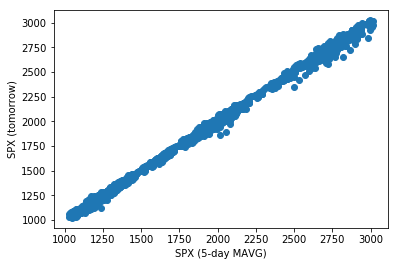

In [27]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("SPX (5-day MAVG)")
plt.ylabel("SPX (tomorrow)")

In [28]:
# #Note: **** I think we need to select which part of data we want to use as "TRAIN"

# # Use sklearn's `train_test_split` to split the data into training and testing

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
# # Create the model

# from sklearn.linear_model import LinearRegression

# model = LinearRegression()

In [30]:
# # Fit the model to the training data. 

# model.fit(X_train, y_train)

In [31]:
# # Calculate the mean_squared_error and the r-squared value
# # for the testing data

# from sklearn.metrics import mean_squared_error, r2_score

# # Use our model to make predictions
# predicted = model.predict(X_test)

# # Score the predictions with mse and r2
# mse = mean_squared_error(y_test, predicted)
# r2 = r2_score(y_test, predicted)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2 ): {r2}")


In [32]:
spx_5day_df.head()

,m5avg,SPX_tomorrow
Date,,
2010-01-06,1130.944,1141.69
2010-01-07,1136.262,1144.98
2010-01-08,1138.662,1146.98
2010-01-11,1141.462,1136.22
2010-01-12,1141.402,1145.68


In [33]:
# #split into train and validation (test)
# train = spx_5day_df[:1983]
# valid = spx_5day_df[1983:]

# x_train = train['m5avg']
# y_train = train['SPX_tomorrow']
# x_valid = valid['m5avg']
# y_valid = valid['SPX_tomorrow']



In [34]:
#MODEL STARTS HERE!!!


# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = spx_5day_df["m5avg"].values.reshape(-1, 1)
y = spx_5day_df["SPX_tomorrow"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2523, 1) (2523, 1)


In [35]:
x_train = X[:1983]
y_train = y[:1983]
x_test = X[1983:]
y_test = y[1983:]


In [36]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#make predictions and find the rmse
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

35.140467331403315

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, preds)
r2

0.9386482326106889

In [39]:
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# #plot
# valid['Predictions'] = 0
# valid['Predictions'] = preds

# valid.index = spx_5day_df[1983:].index
# train.index = spx_5day_df[:1983].index

# plt.plot(train['SPX_tomorrow'])
# plt.plot(valid[['SPX_tomorrow', 'Predictions']])

In [40]:
predicted_df = spx_5day_df[1983:].copy()

predicted_df['Predicted_tomorrow']=preds

predicted_df.head()

,m5avg,SPX_tomorrow,Predicted_tomorrow
Date,,,
2017-08-14,2458.862,2464.61,2461.078696
2017-08-15,2456.800,2468.11,2459.016101
2017-08-16,2455.618,2430.01,2457.833760
2017-08-17,2453.978,2425.55,2456.193287
2017-08-18,2450.824,2428.37,2453.038378


In [41]:
predicted_df.describe()

,m5avg,SPX_tomorrow,Predicted_tomorrow
count,540.000000,540.000000,540.000000
mean,2740.010926,2742.844926,2742.308701
std,141.002472,142.002664,141.043135
min,2434.108000,2351.100000,2436.317557
25%,2645.760500,2643.350000,2648.031095
50%,2742.635000,2747.085000,2744.933532
75%,2850.759500,2856.997500,2853.089214
max,3016.648000,3025.860000,3019.025554


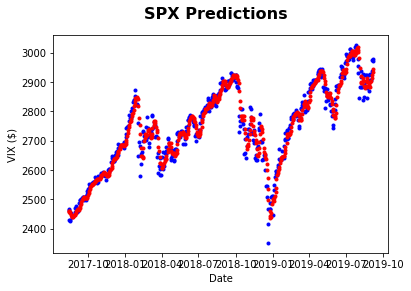

In [42]:
#More Dependencies
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot data 
#Note: only plotting SPX
fig, ax = plt.subplots()

fig.suptitle("SPX Predictions", fontsize=16, fontweight="bold")

ax.set_xlabel("Date")
ax.set_ylabel("VIX ($)")

ax.plot(predicted_df.index, predicted_df["SPX_tomorrow"], '.b')
ax.plot(predicted_df.index, predicted_df["Predicted_tomorrow"], '.r')

plt.show()

In [43]:
spx_df.loc['2017-08-14':]

,SPX
Date,
2017-08-14,2465.84
2017-08-15,2464.61
2017-08-16,2468.11
2017-08-17,2430.01
2017-08-18,2425.55
2017-08-21,2428.37
2017-08-22,2452.51
2017-08-23,2444.04
2017-08-24,2438.97


In [44]:
predicted_df.head(10)

,m5avg,SPX_tomorrow,Predicted_tomorrow
Date,,,
2017-08-14,2458.862,2464.61,2461.078696
2017-08-15,2456.800,2468.11,2459.016101
2017-08-16,2455.618,2430.01,2457.833760
2017-08-17,2453.978,2425.55,2456.193287
2017-08-18,2450.824,2428.37,2453.038378
2017-08-21,2443.330,2452.51,2445.542216
2017-08-22,2440.910,2444.04,2443.121518
2017-08-23,2436.096,2438.97,2438.306130
2017-08-24,2437.888,2443.05,2440.098647


In [45]:
predicted_df['today'] = spx_df.loc['2017-08-14':]
predicted_df.head(10)

,m5avg,SPX_tomorrow,Predicted_tomorrow,today
Date,,,,
2017-08-14,2458.862,2464.61,2461.078696,2465.84
2017-08-15,2456.800,2468.11,2459.016101,2464.61
2017-08-16,2455.618,2430.01,2457.833760,2468.11
2017-08-17,2453.978,2425.55,2456.193287,2430.01
2017-08-18,2450.824,2428.37,2453.038378,2425.55
2017-08-21,2443.330,2452.51,2445.542216,2428.37
2017-08-22,2440.910,2444.04,2443.121518,2452.51
2017-08-23,2436.096,2438.97,2438.306130,2444.04
2017-08-24,2437.888,2443.05,2440.098647,2438.97


In [46]:
predicted_df['predicted_delta'] = predicted_df['Predicted_tomorrow']-predicted_df['today']
predicted_df['actual_delta'] = predicted_df['SPX_tomorrow']-predicted_df['today']
predicted_df.head(25)

,m5avg,SPX_tomorrow,Predicted_tomorrow,today,predicted_delta,actual_delta
Date,,,,,,
2017-08-14,2458.862,2464.61,2461.078696,2465.84,-4.761304,-1.23
2017-08-15,2456.800,2468.11,2459.016101,2464.61,-5.593899,3.50
2017-08-16,2455.618,2430.01,2457.833760,2468.11,-10.276240,-38.10
2017-08-17,2453.978,2425.55,2456.193287,2430.01,26.183287,-4.46
2017-08-18,2450.824,2428.37,2453.038378,2425.55,27.488378,2.82
2017-08-21,2443.330,2452.51,2445.542216,2428.37,17.172216,24.14
2017-08-22,2440.910,2444.04,2443.121518,2452.51,-9.388482,-8.47
2017-08-23,2436.096,2438.97,2438.306130,2444.04,-5.733870,-5.07
2017-08-24,2437.888,2443.05,2440.098647,2438.97,1.128647,4.08


In [47]:
#Calc profit
#Note: only strategy is LONG
pr=0
prt=[]
prt.append(0)
totpr=0
buy=0
sell=0
c_df=predicted_df["today"]
sig_df=predicted_df["predicted_delta"]
for i in range(1,len(c_df)):
  if (sig_df[i-1]<0 and sig_df[i]>0):
      buy=1;
      bp=c_df[i];
  if (sig_df[i-1]>0 and sig_df[i]<0):
      sp=c_df[i];
      if (buy==1):
          pr=sp-bp;
          buy=0;
          totpr+=pr
  prt.append(totpr)
print(prt) 

[0, 0, 0, 0, 0, 0, 22.5, 22.5, 22.5, 22.5, 22.5, 29.830000000000382, 29.830000000000382, 29.830000000000382, 29.830000000000382, 29.830000000000382, 29.830000000000382, 29.830000000000382, 29.830000000000382, 29.830000000000382, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 60.0900000000006, 66.53000000000065, 66.53000000000065, 66.53000000000065, 66.53000000000065, 66.53000000000065, 66.53000000000065, 66.53000000000065, 66.53000000000065, 66.53000000000065, 72.44000000000051, 72.44000000000051, 72.44000000000051, 72.44000000000051, 79.15000000000055, 79.15000000000055, 79.15000000000055, 79.15000000000055, 79.15000000000055, 79.15000000000055, 83.30000000000064, 83.30000000000064, 83.30000000000064, 107.22000000000071, 107.22000000000071, 107.22000000000071, 107.22000000000071, 107.22000000000071, 115.21000000000095, 115.2100000000009

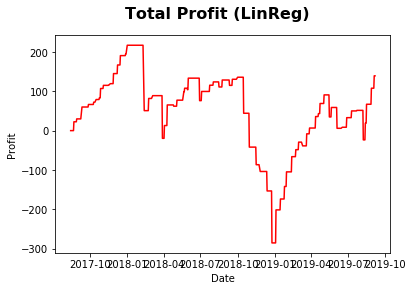

In [63]:
fig, ax = plt.subplots()
fig.suptitle("Total Profit (LinReg)", fontsize=16, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Profit")
#ax.plot(predicted_df.index, predicted_df["SPX_tomorrow"], '.b')
ax.plot(predicted_df.index, prt, '-r')
plt.show()

In [49]:
predicted_df['cum_profit'] = prt
predicted_df.tail(10)

,m5avg,SPX_tomorrow,Predicted_tomorrow,today,predicted_delta,actual_delta,cum_profit
Date,,,,,,,
2019-08-26,2894.676,2869.16,2897.018379,2878.38,18.638379,-9.22,67.11
2019-08-27,2888.406,2887.94,2890.746571,2869.16,21.586571,18.78,67.11
2019-08-28,2881.108,2924.58,2883.446466,2887.94,-4.493534,36.64,107.94
2019-08-29,2881.434,2926.46,2883.772560,2924.58,-40.807440,1.88,107.94
2019-08-30,2897.304,2906.27,2899.647137,2926.46,-26.812863,-20.19,107.94
2019-09-02,2902.882,2906.27,2905.226745,2906.27,-1.043255,0.00,107.94
2019-09-03,2910.304,2937.78,2912.650886,2906.27,6.380886,31.51,107.94
2019-09-04,2920.272,2976.00,2922.621760,2937.78,-15.158240,38.22,139.45
2019-09-05,2930.556,2978.71,2932.908726,2976.00,-43.091274,2.71,139.45


In [50]:
profit_df = predicted_df.copy()

In [51]:
profit_df = profit_df.filter(['cum_profit'], axis=1)

profit_df.tail()


,cum_profit
Date,
2019-09-02,107.94
2019-09-03,107.94
2019-09-04,139.45
2019-09-05,139.45
2019-09-06,139.45


In [52]:
print('Total Profit= $139.45')
print('Initial Investment = $2430.01')
print('%Gain = 5.7%')



Total Profit= $139.45
Initial Investment = $2430.01
%Gain = 5.7%


In [53]:
# profit_df.to_csv('profit.csv')

In [54]:
num_correct = 0
num_wrong = 0
num_no_actual_mov = 0

for i in range(0, len(predicted_df['predicted_delta'])):
    p_delta = predicted_df['predicted_delta'][i]
    a_delta = predicted_df['actual_delta'][i]
    
    if a_delta==0:
        num_no_actual_mov = num_no_actual_mov + 1
    
    if p_delta==0:
        print("whoa")
           
    elif p_delta>0:               
        if a_delta>0:
            num_correct = num_correct + 1
        else:
            num_wrong = num_wrong + 1
            
    else:
       
        if a_delta<0:
            num_correct = num_correct + 1
            
        else:
            
            num_wrong = num_wrong + 1

print("correct")
print(num_correct)  
print("wrong")
print(num_wrong)
print("no actual movement")
print(num_no_actual_mov)
print(len(predicted_df['predicted_delta']))       

correct
258
wrong
282
no actual movement
20
540


In [55]:
p_delta.dtype

dtype('float64')

In [56]:
predicted_df.head(10)

,m5avg,SPX_tomorrow,Predicted_tomorrow,today,predicted_delta,actual_delta,cum_profit
Date,,,,,,,
2017-08-14,2458.862,2464.61,2461.078696,2465.84,-4.761304,-1.23,0.0
2017-08-15,2456.800,2468.11,2459.016101,2464.61,-5.593899,3.50,0.0
2017-08-16,2455.618,2430.01,2457.833760,2468.11,-10.276240,-38.10,0.0
2017-08-17,2453.978,2425.55,2456.193287,2430.01,26.183287,-4.46,0.0
2017-08-18,2450.824,2428.37,2453.038378,2425.55,27.488378,2.82,0.0
2017-08-21,2443.330,2452.51,2445.542216,2428.37,17.172216,24.14,0.0
2017-08-22,2440.910,2444.04,2443.121518,2452.51,-9.388482,-8.47,22.5
2017-08-23,2436.096,2438.97,2438.306130,2444.04,-5.733870,-5.07,22.5
2017-08-24,2437.888,2443.05,2440.098647,2438.97,1.128647,4.08,22.5


In [57]:
pl5_df = predicted_df.filter(['today'], axis=1) 
pl5_df['predicted_delta'] = predicted_df['predicted_delta']
pl5_df.head(10)

,today,predicted_delta
Date,,
2017-08-14,2465.84,-4.761304
2017-08-15,2464.61,-5.593899
2017-08-16,2468.11,-10.276240
2017-08-17,2430.01,26.183287
2017-08-18,2425.55,27.488378
2017-08-21,2428.37,17.172216
2017-08-22,2452.51,-9.388482
2017-08-23,2444.04,-5.733870
2017-08-24,2438.97,1.128647


In [58]:
#Joined Dataframes where index ('Date') matches

final1_df = spx_5day_df.join(time_indexed_stock_df)
final1_df.head(10)

,m5avg,SPX_tomorrow,PX_LAST_ESA,PX_LAST_1,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8
Date,,,,,,,,,,,
2010-01-06,1130.944,1141.69,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30
2010-01-07,1136.262,1144.98,1141.69,20.45,23.15,23.85,24.75,24.85,24.85,24.90,25.10
2010-01-08,1138.662,1146.98,1144.98,19.90,22.55,23.40,24.40,24.65,24.60,24.75,24.90
2010-01-11,1141.462,1136.22,1146.98,19.50,22.25,23.25,24.15,24.30,24.40,24.50,24.65
2010-01-12,1141.402,1145.68,1136.22,20.25,22.80,23.65,24.25,24.45,24.45,24.60,24.75
2010-01-13,1143.110,1148.46,1145.68,19.40,22.50,23.45,24.15,24.40,24.40,24.55,24.55
2010-01-14,1144.464,1136.03,1148.46,18.95,22.00,23.00,23.65,23.95,24.00,24.15,24.25
2010-01-15,1142.674,1150.23,1136.03,19.65,22.55,23.55,24.05,24.30,24.35,24.45,24.45
2010-01-18,1143.324,1150.23,1150.23,17.85,21.55,22.75,23.55,23.80,23.80,23.90,24.10


In [59]:
cur_price_df = time_indexed_stock_df

In [60]:
# time_indexed_stock_df.loc['2017-08-14':]

In [61]:
#Calculate Standard Deviation of all (and only) VIX Futures on "Erkan Dates"
std_dev_spx = final1_df.std(axis=1)
std_dev_spx.head(10)

Date
2010-01-06    519.581071
2010-01-07    521.750623
2010-01-08    523.108710
2010-01-11    522.308322
2010-01-12    521.966334
2010-01-13    524.240762
2010-01-14    523.156906
2010-01-15    522.956900
2010-01-18    525.616812
2010-01-19    524.159425
dtype: float64

In [62]:
#Add column of 1/StdDev to joined DataFrame
#Because we want "closer numbers" (lower StdDev) to have "more weight"
#final1_df.insert(loc=0, column='1/StdDev', value=1/std_dev_spx)
final1_df.head(20)

,m5avg,SPX_tomorrow,PX_LAST_ESA,PX_LAST_1,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8
Date,,,,,,,,,,,
2010-01-06,1130.944,1141.69,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30
2010-01-07,1136.262,1144.98,1141.69,20.45,23.15,23.85,24.75,24.85,24.85,24.90,25.10
2010-01-08,1138.662,1146.98,1144.98,19.90,22.55,23.40,24.40,24.65,24.60,24.75,24.90
2010-01-11,1141.462,1136.22,1146.98,19.50,22.25,23.25,24.15,24.30,24.40,24.50,24.65
2010-01-12,1141.402,1145.68,1136.22,20.25,22.80,23.65,24.25,24.45,24.45,24.60,24.75
2010-01-13,1143.110,1148.46,1145.68,19.40,22.50,23.45,24.15,24.40,24.40,24.55,24.55
2010-01-14,1144.464,1136.03,1148.46,18.95,22.00,23.00,23.65,23.95,24.00,24.15,24.25
2010-01-15,1142.674,1150.23,1136.03,19.65,22.55,23.55,24.05,24.30,24.35,24.45,24.45
2010-01-18,1143.324,1150.23,1150.23,17.85,21.55,22.75,23.55,23.80,23.80,23.90,24.10
